In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!pip install scikit-learn


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python3 -m pip install --upgrade pip


In [3]:
df_train = pd.read_csv("playground-series-s4e9/train.csv")
df_test = pd.read_csv("playground-series-s4e9/test.csv")

In [4]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,MINI,Cooper S Base,2007,213000,Gasoline,172.0HP 1.6L 4 Cylinder Engine Gasoline Fuel,A/T,Yellow,Gray,None reported,Yes,4200
1,1,Lincoln,LS V8,2002,143250,Gasoline,252.0HP 3.9L 8 Cylinder Engine Gasoline Fuel,A/T,Silver,Beige,At least 1 accident or damage reported,Yes,4999
2,2,Chevrolet,Silverado 2500 LT,2002,136731,E85 Flex Fuel,320.0HP 5.3L 8 Cylinder Engine Flex Fuel Capab...,A/T,Blue,Gray,None reported,Yes,13900
3,3,Genesis,G90 5.0 Ultimate,2017,19500,Gasoline,420.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,Black,Black,None reported,Yes,45000
4,4,Mercedes-Benz,Metris Base,2021,7388,Gasoline,208.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Black,Beige,None reported,Yes,97500


In [5]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,188533,Land,Rover LR2 Base,2015,98000,Gasoline,240.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,6-Speed A/T,White,Beige,None reported,Yes
1,188534,Land,Rover Defender SE,2020,9142,Hybrid,395.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,Silver,Black,None reported,Yes
2,188535,Ford,Expedition Limited,2022,28121,Gasoline,3.5L V6 24V PDI DOHC Twin Turbo,10-Speed Automatic,White,Ebony,None reported,NaN
3,188536,Audi,A6 2.0T Sport,2016,61258,Gasoline,2.0 Liter TFSI,Automatic,Silician Yellow,Black,None reported,NaN
4,188537,Audi,A6 2.0T Premium Plus,2018,59000,Gasoline,252.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,A/T,Gray,Black,None reported,Yes


Exploratory data analysis

In [6]:
df_train.shape

(188533, 13)

In [7]:
df_train.accident.value_counts().sum

<bound method Series.sum of accident
None reported                             144514
At least 1 accident or damage reported     41567
Name: count, dtype: int64>

In [8]:
df_train.isna().sum()

id                  0
brand               0
model               0
model_year          0
milage              0
fuel_type        5083
engine              0
transmission        0
ext_col             0
int_col             0
accident         2452
clean_title     21419
price               0
dtype: int64

In [9]:
avg_price = df_train.groupby("accident")["price"].mean()

In [10]:
avg_price.head()

accident
At least 1 accident or damage reported    25334.071475
None reported                             49024.804144
Name: price, dtype: float64

In [11]:

# Convert "yes"/"no" to 1/0
df_train['clean_title'] = df_train['clean_title'].map({'Yes': 1, 'No': 0})

In [12]:
df_train.dtypes

id                int64
brand            object
model            object
model_year        int64
milage            int64
fuel_type        object
engine           object
transmission     object
ext_col          object
int_col          object
accident         object
clean_title     float64
price             int64
dtype: object

In [13]:
accident_mode = df_train["accident"].mode()[0]
fuel_mode = df_train["fuel_type"].mode()[0]
clean_title_mode = df_train["clean_title"].mode()[0]
print(accident_mode,fuel_mode,clean_title_mode)

None reported Gasoline 1.0


In [14]:
df_train["accident"] = df_train["accident"].fillna(accident_mode)
df_train["fuel_type"] = df_train["fuel_type"].fillna(fuel_mode)
df_train["clean_title"] = df_train["clean_title"].fillna(clean_title_mode)

In [15]:
df_train['clean_title'] = df_train['clean_title'].astype(int)

In [ ]:
df_train.isna().sum()

id              0
brand           0
model           0
model_year      0
milage          0
fuel_type       0
engine          0
transmission    0
ext_col         0
int_col         0
accident        0
clean_title     0
price           0
dtype: int64

: 

Pre-Processing

In [ ]:
df_dummies = pd.get_dummies(df_train, 
                     columns = ['brand', 'model','model_year','fuel_type','engine','transmission','ext_col','int_col','accident','clean_title'],dtype=int)

In [ ]:
df_dummies.head()

,id,milage,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,...,int_col_WHITE,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_1
0,0,213000,4200,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
1,1,143250,4999,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
2,2,136731,13900,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
3,3,19500,45000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,4,7388,97500,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [ ]:
print(len(df_dummies.columns.to_list()))

3645


In [ ]:
df_dummies = df_dummies.drop(['id'],axis=1)

In [ ]:
df_dummies["milage"].describe()

count    188533.000000
mean      65705.295174
std       49798.158076
min         100.000000
25%       24115.000000
50%       57785.000000
75%       95400.000000
max      405000.000000
Name: milage, dtype: float64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


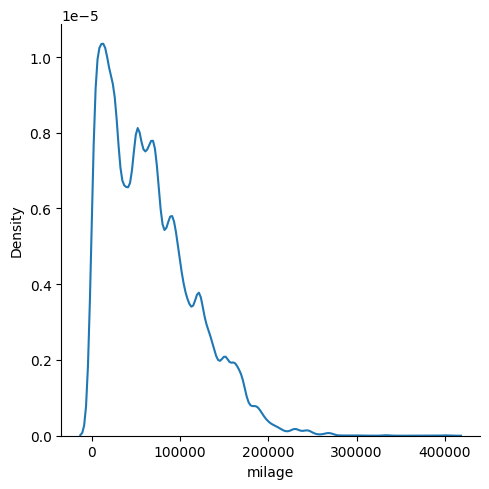

In [ ]:
sns.displot(df_dummies, x="milage", kind="kde")

In [ ]:
# Apply log transformation to the 'mileage' column
df_dummies['log_milage'] = np.log(df_dummies['milage'] + 1)  # Adding 1 to avoid issues with log(0)

In [ ]:
df_dummies.head()

,milage,price,brand_Acura,brand_Alfa,brand_Aston,brand_Audi,brand_BMW,brand_Bentley,brand_Bugatti,brand_Buick,...,int_col_Walnut,int_col_Whisper Beige,int_col_White,int_col_White / Brown,int_col_Yellow,int_col_–,accident_At least 1 accident or damage reported,accident_None reported,clean_title_1,log_milage
0,213000,4200,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,12.269052
1,143250,4999,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,11.872354
2,136731,13900,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,11.825778
3,19500,45000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9.878221
4,7388,97500,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,8.907748


Building model

In [ ]:
y = df_dummies["price"]
X = df_dummies.drop(columns=["milage","price"])

NameError: name 'df_dummies' is not defined

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% training, 20% testing in this example)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error,r2_score

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [ ]:
mse= root_mean_squared_error(y_test,y_pred)

NameError: name 'mean_squared_error' is not defined